# 200 개 다 써보기

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

# 정규화 (StandardScaler 사용)
from sklearn.preprocessing import StandardScaler

# 분류
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# LightGBM 분류기
from lightgbm import LGBMClassifier


In [5]:
# 1. Raw Data Loading
# Target: 1 = 거래, 0 = 미래래
data = pd.read_csv('C:/education/pythonedu/MoonExercise/CustomerTransaction/trainCT.csv')
display(data)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [6]:
# Feature Engineering_ 상관계수 분석
# 일단 ID code는 필요 없으니 버림
df = data.drop('ID_code', axis = 1, inplace = False)
df.head(5)

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


# Standardise_ 정규화

In [9]:
sc = StandardScaler()
df_norm = pd.DataFrame(sc.fit_transform(df.drop("target", axis = 1)))
df_norm.columns = df.drop("target", axis=1).columns  # 컬럼 이름 다시 가져오고 
df_norm["target"] = df["target"].copy()  # 정규화된 독립변수에 종속변수를 붙임
df_norm

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
0,-0.577102,-1.273737,0.451707,-0.833709,0.235571,-0.536430,-0.334926,0.608751,-1.561580,-1.473796,...,-1.149158,0.817469,-0.411013,0.168705,-1.578117,1.022131,-0.373968,-1.026398,0.214135,0
1,0.269959,-0.622138,1.190360,-0.688846,0.790975,1.539900,0.244461,-0.003525,0.858974,0.419300,...,0.093605,0.443623,1.908764,-0.817594,1.522342,1.067654,-0.129400,0.825417,0.505685,0
2,-0.681113,-0.276066,0.516988,0.536516,-0.305477,-0.511033,1.769839,-0.564749,-1.561370,-1.307408,...,0.777997,-0.174131,-0.412316,1.151591,2.297370,-1.617906,-0.695141,-0.381449,0.356681,0
3,0.125158,-0.129426,-0.667575,0.195355,0.927992,0.410672,0.500633,-0.474201,-1.843910,0.548767,...,-0.891456,-0.818468,-0.478548,1.607869,-0.789517,-0.959020,1.501744,0.697118,-0.543502,0
4,-0.277303,0.035610,0.817683,-0.077829,0.738607,0.955574,0.613372,0.791544,1.794753,0.090006,...,0.688988,-1.405987,1.468536,-1.501101,-0.958473,0.297627,0.645537,0.706318,-0.525375,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.265814,0.279509,-0.928851,-1.606375,-0.454632,2.120424,0.302273,-0.407906,-0.271576,-1.538651,...,1.915840,1.394910,-0.599439,0.009925,-1.155623,-0.025161,-0.407496,0.264130,-1.392947,0
199996,-1.896359,-0.202660,2.268180,-0.079297,-1.705783,-0.699136,0.543790,1.476902,-1.189411,-1.267410,...,-0.920696,-0.830643,-0.375167,1.364499,1.312319,-0.819242,-2.350481,0.011518,0.351154,0
199997,0.178710,-0.845469,-0.076676,-0.563266,-1.070350,-0.043657,-0.984818,1.466106,-0.049199,-1.137053,...,-0.660547,0.795012,0.387655,1.766202,-1.001499,-0.187031,-0.209042,-0.676806,0.721024,0
199998,-0.317467,-1.723980,1.096301,-0.491128,0.886530,0.712074,0.737304,0.137314,-0.743186,0.961052,...,0.403634,0.545083,1.950397,0.772535,0.044417,0.824051,1.221803,-0.113526,-1.012989,0


# DownSampling

In [10]:
# 타겟 0인 데이터 중에서 target 1인 데이터 갯수만큼 랜덤 샘플링함
df_ds = df_norm[df_norm["target"] == 0].sample(n=df_norm[df_norm["target"] == 1].shape[0], random_state=42)
df_1 = df_norm[df_norm["target"] == 1]  # 1만 뽑고

df_downsampled = pd.concat([df_1, df_ds], ignore_index=True) # 둘이 붙임...
df_downsampled['target'].value_counts()

target
1    20098
0    20098
Name: count, dtype: int64

# 데이터 분리

In [11]:
X = df_downsampled.drop("target", axis=1)
Y = df_downsampled["target"]

# 모델링

### Cross-Validation
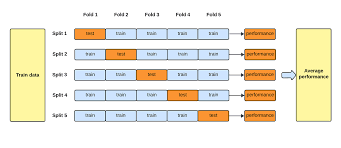

### GaussianNB  가우시안 나이브 베이즈
- 각 피처(변수)가 정규분포(가우시안 분포) 를 따른다고 가정하고 작동하는 모델
- 학습 방식:	각 클래스 별로 평균과 분산 계산 → 새로운 데이터가 들어오면 확률 비교해서 분류
- 데이터가 피처 간 독립에 가까울 때 쓰면 좋음.?

⚠️ 주의할 점
- 피처 간 상관관계가 크거나, 정규분포가 아닌 경우 성능이 떨어질 수 있음
- 아주 복잡한 문제에서는 성능이 단순 모델 수준

In [13]:
np.random.seed(42)

models = {"Logistic Regression":LogisticRegression(),
          # "Random Tree Classifier":RandomForestClassifier(),
          "Gaussian Naive Bayes":GaussianNB()   # 가우시안 나이브 베이즈
         }
results = dict()

for model in models:
  print("Fitting {}...".format(model), end = " ")
  scores = cross_val_score(models[model], X, Y, cv=10, scoring = "roc_auc", n_jobs = -1)
  results[model] = scores
  score = scores.mean()
  print("Done! Mean AUC score: {}".format(score))



Fitting Logistic Regression... Done! Mean AUC score: 0.8591672314194059
Fitting Gaussian Naive Bayes... Done! Mean AUC score: 0.8874792733212906


# Training 
- Gaussian Naive Bayes가 가장 점수가 높으니 사용

In [17]:
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(X, 
                 Y, 
                 random_state=42, 
                 test_size=0.2)

gnb = GaussianNB()
gnb.fit(x_data_train, t_data_train)

GaussianNB()

# Testing

In [18]:
pred_test = gnb.predict(x_data_test)  # 예측값
print("Test AUC: {}".format(roc_auc_score(t_data_test, pred_test)))
print(classification_report(t_data_test, pred_test))
print("\n")

# Test AUC: 0.8081077893276668
#               precision    recall  f1-score   support

#            0       0.81      0.80      0.81      4049
#            1       0.80      0.81      0.81      3991

#     accuracy                           0.81      8040
#    macro avg       0.81      0.81      0.81      8040
# weighted avg       0.81      0.81      0.81      8040

Test AUC: 0.8081077893276668
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      4049
           1       0.80      0.81      0.81      3991

    accuracy                           0.81      8040
   macro avg       0.81      0.81      0.81      8040
weighted avg       0.81      0.81      0.81      8040





# 일단 test 데이터를 넣어보자

In [25]:
# 1. raw data loading
test = pd.read_csv('C:/education/pythonedu/MoonExercise/CustomerTransaction/testCT.csv')

t = test.drop("ID_code", axis = 1)
t

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,13.1678,1.0136,10.4333,6.7997,8.5974,-4.1641,4.8579,14.7625,-2.7239,6.9937,...,2.0544,9.6849,4.6734,-1.3660,12.8721,1.2013,-4.6195,9.1568,18.2102,4.8801
199996,9.7171,-9.1462,7.3443,9.1421,12.8936,3.0191,5.6888,18.8862,5.0915,6.3545,...,5.0071,6.6548,1.8197,2.4104,18.9037,-0.9337,2.9995,9.1112,18.1740,-20.7689
199997,11.6360,2.2769,11.2074,7.7649,12.6796,11.3224,5.3883,18.3794,1.6603,5.7341,...,5.1536,2.6498,2.4937,-0.0637,20.0609,-1.1742,-4.1524,9.1933,11.7905,-22.2762
199998,13.5745,-0.5134,13.6584,7.4855,11.2241,-11.3037,4.1959,16.8280,5.3208,8.9032,...,3.4259,8.5012,2.2713,5.7621,17.0056,1.1763,-2.3761,8.1079,8.7735,-0.2122


In [26]:
# 정규화
test_norm = sc.transform(t)

In [27]:
# 모델...
res = gnb.predict(test_norm[0].reshape(1, -1))
res

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [30]:
# for문은 오래 걸리니 웬만해서는 쓰지 말기
preds = gnb.predict(test_norm)

# 결과 저장
my_ans200 = pd.DataFrame({
    'ID_code': [f'test_{i}' for i in range(len(test))],
    'target': preds
})

display(my_ans200.head(5))

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


,ID_code,target
0,test_0,1
1,test_1,1
2,test_2,1
3,test_3,1
4,test_4,0


In [31]:
my_ans200['target'].value_counts()

target
0    150327
1     49673
Name: count, dtype: int64

In [33]:
my_ans200.to_csv("GNB200_CustomerTransaction.csv", index=False)

from IPython.display import FileLink

# Create a link to the file
FileLink(r'GNB200_CustomerTransaction.csv')

c:\education\pythonedu\MoonExercise\CustomerTransaction\GNB200_CustomerTransaction.csv